# Problem Statement

Wine Quality Prediction-
Here, we will apply a method of assessing wine quality using a decision tree, and test it against the wine-quality dataset from the UC Irvine Machine Learning Repository.



The wine dataset is a classic and very easy multi-class classification dataset.
Find more about data here - https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

In [1]:
#Import all the necessary modules
from pandas import read_csv
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier , DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics

# Q1. Load the Wine Data file into Python DataFrame. 


Let us assume the data frame is named wine_df


In [2]:
wine_df = pd.read_csv("winequality-red.csv")
wine_df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset.

# Q2. Print 10 samples from the dataset

In [7]:
wine_df.head(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


# Q3 Print the datatypes of each column and the shape of the dataset 

In [8]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed_acidity           1599 non-null float64
volatile_acidity        1599 non-null float64
citric_acid             1599 non-null float64
residual_sugar          1599 non-null float64
chlorides               1599 non-null float64
free_sulfur_dioxide     1599 non-null float64
total_sulfur_dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
wine_df.shape

(1599, 12)

# Q4 Print the descriptive statistics of each & every column using describe() function

In [40]:
wine_df.loc[wine_df['quality'] >= 6.5, ['new_qual']] = 1

wine_df.loc[wine_df['quality'] < 6.5, ['new_qual']] = 0

wine_df['new_qual'].value_counts()

wine_df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,new_qual
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.000000


# Q5 Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes).

(fixed_acidity           0.982751
 volatile_acidity        0.671593
 citric_acid             0.318337
 residual_sugar          4.540655
 chlorides               5.680347
 free_sulfur_dioxide     1.250567
 total_sulfur_dioxide    1.515531
 density                 0.071288
 pH                      0.193683
 sulphates               2.428672
 alcohol                 0.860829
 quality                 0.217802
 new_qual                2.129363
 dtype: float64, fixed_acidity            1.132143
 volatile_acidity         1.225542
 citric_acid             -0.788998
 residual_sugar          28.617595
 chlorides               41.715787
 free_sulfur_dioxide      2.023562
 total_sulfur_dioxide     3.809824
 density                  0.934079
 pH                       0.806943
 sulphates               11.720251
 alcohol                  0.200029
 quality                  0.296708
 new_qual                 2.537360
 dtype: float64)

<Figure size 1152x720 with 0 Axes>

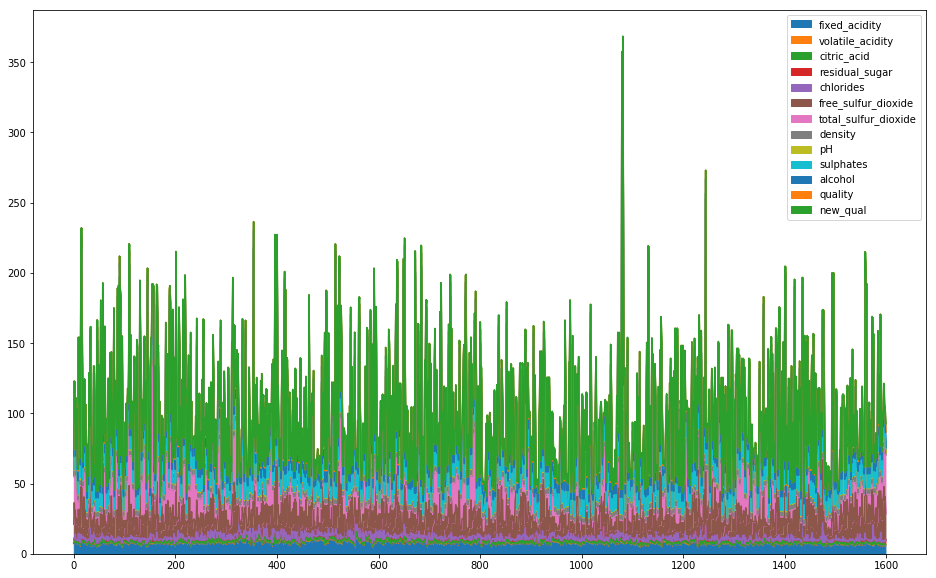

In [41]:
pyplot.figure(figsize=(16, 10))

wine_df.plot.area(figsize=(16, 10))

wine_df.skew() , wine_df.kurtosis()

# if skewness is less than −1 or greater than +1, the distribution is highly skewed.
 Below are highly skewed.
 chlorides               5.680347
 free_sulfur_dioxide     1.250567
 total_sulfur_dioxide    1.515531
 sulphates               2.428672

# If skewness is between −1 and −0.5 or between +0.5 and +1, the distribution is moderately skewed.

fixed_acidity           0.982751
volatile_acidity        0.671593
alcohol                 0.860829

# If skewness is between −0.5 and +0.5, the distribution is approximately symmetric.

citric_acid             0.318337
density                 0.071288
pH                      0.193683
quality                 0.217802

# A normal distribution has kurtosis exactly 3 (excess kurtosis exactly 0). Any distribution with kurtosis ≈3 (excess ≈0) is called mesokurtic.

# A distribution with kurtosis <3 (excess kurtosis <0) is called platykurtic. Compared to a normal distribution, its tails are shorter and thinner, and often its central peak is lower and broader.

# A distribution with kurtosis >3 (excess kurtosis >0) is called leptokurtic. Compared to a normal distribution, its tails are longer and fatter, and often its central peak is higher and sharper.

# Q6. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,new_qual
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052,0.120061
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558,-0.270712
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373,0.214716
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732,0.047779
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907,-0.097308
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656,-0.071747
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100,-0.139517
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919,-0.150460
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731,-0.057283
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397,0.199485


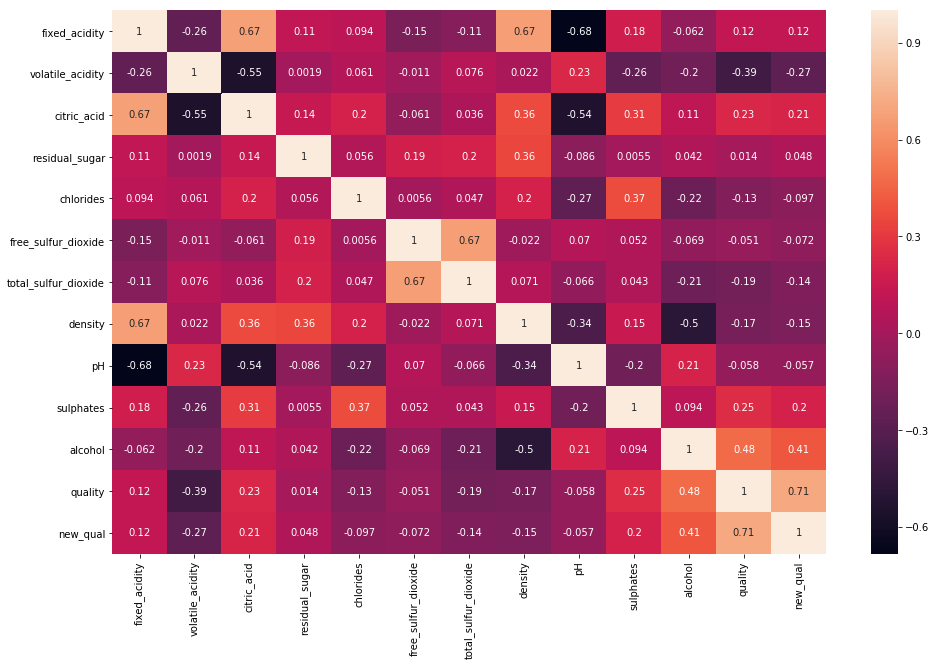

In [42]:
corr = wine_df.corr()

pyplot.figure(figsize=(16, 10))

sns.heatmap(corr,annot=True)

corr

# Positively correlated

# Citric_Acid vs Fixed_acidity
# Density vs Fixed_Acidity
# Free_Sulfur_dioxide vs Total_Sulfur_dioxide

#Negatively correlated

# PH vs Fixed_Acidity
# Citric_acid vs Volatile_acidity
# Citric_acid vs PH


# Q7 Split the wine_df into training and test set in the ratio of 70:30 (Training:Test) based on dependent and independent variables.



In [44]:
# X - Citric_Acid, Fixed_acidity,Density,Free_Sulfur_dioxide,Total_Sulfur_dioxide ,PH,Volatile_acidity
# Y - New Quality

array = wine_df[['citric_acid', 'fixed_acidity','density','free_sulfur_dioxide','total_sulfur_dioxide' ,'pH','volatile_acidity','new_qual']].values

X = array[:,0:6] 
Y = array[:,7]  
test_size = 0.30 
seed = 10
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)


# Q8 Create the decision tree model using “entropy” method of finding the split columns and fit it to training data.




In [70]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 12, random_state = 100)

dt_model.fit(X_train, y_train)

dt_model.score(X_test , y_test) , dt_model.score(X_train , y_train)

(0.8458333333333333, 0.968722073279714)

# Q9 Print the accuracy of the model & print the confusion matrix 

In [46]:

y_predict = dt_model.predict(X_test)
print(metrics.confusion_matrix(y_test, y_predict))

[[369  42]
 [ 35  34]]


# Q10. Regularize the decision tree by limiting the max. depth of trees and print the accuracy.

In [71]:
dt_model = DecisionTreeClassifier(criterion = 'entropy',max_depth = 5, random_state = 100)

dt_model.fit(X_train, y_train)

dt_model.score(X_test , y_test) , dt_model.score(X_train , y_train)

(0.86875, 0.8963360142984808)

# Q11 Apply the Random forest model and print the accuracy of Random forest Model

In [47]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 100)
rfcl = rfcl.fit(X_train, y_train)

In [48]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test , y_test))
print(metrics.confusion_matrix(y_test, y_predict))

0.8958333333333334
[[404   7]
 [ 43  26]]


# Q12 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [49]:
from sklearn.ensemble import AdaBoostClassifier
#abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=10)
abcl = AdaBoostClassifier( n_estimators=50)
abcl = abcl.fit(X_train, y_train)

In [50]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))

print(metrics.confusion_matrix(y_test, y_predict))

0.8416666666666667
[[390  21]
 [ 55  14]]


# Q13 - Apply Bagging Classifier Algorithm and print the accuracy.

In [51]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(base_estimator=dt_model, n_estimators=50)
bgcl = bgcl.fit(X_train, y_train)

In [52]:
y_predict = bgcl.predict(X_test)
print(bgcl.score(X_test , y_test))
print(metrics.confusion_matrix(y_test, y_predict))

0.8916666666666667
[[401  10]
 [ 42  27]]


# Q14 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [53]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50)

gbcl = gbcl.fit(X_train, y_train)

In [54]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test , y_test))
print(metrics.confusion_matrix(y_test, y_predict))

0.8791666666666667
[[399  12]
 [ 46  23]]


# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.

In [55]:
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier

kfold = model_selection.KFold(n_splits=10, random_state=seed)

estimators = []

model1 = GradientBoostingClassifier()
estimators.append(('GBCL', model1))

model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))

model3 = BaggingClassifier()
estimators.append(('bgcl', model3))

model4 = AdaBoostClassifier()
estimators.append(('abcl', model4))

model5 = RandomForestClassifier()
estimators.append(('RF', model5))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X_test,y_test, cv=kfold)
print(results.mean())


/home/raj/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/raj/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/raj/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/raj/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Re

0.8479166666666667


/home/raj/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/raj/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
